In [39]:
#Import Statements
import tensorflow as tf
from keras.models import Sequential # type: ignore
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from keras.optimizers import Adam # type: ignore
import numpy as np  # type: ignore # for numerical operations
import pandas as pd  # type: ignore # for dataset operations
import matplotlib.pyplot as plt # type: ignore # for plotting
import os # for file operations
import cv2 # type: ignore # for image processing
import imghdr #type: ignore

In [40]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [41]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [42]:
#Avoid OOM errors by setting GPU memory consumption growth
#Only Run if using the alienware for training
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

    Remove corrupt/incompatible images

In [43]:
data_dir = "data"
os.listdir(data_dir)

['Atopic Dermatitis - 1257',
 'Benign Keratosis-like Lesions (BKL) -2079',
 'Eczema - 1677',
 'Melanoma - 3140',
 'Psoriasis pictures Lichen Planus and related diseases - 2055',
 'Seborrheic Keratoses and other Benign Tumors - 1847',
 'Warts Molluscum and other Viral Infections - 2103']

In [44]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [45]:
#for image_class in os.listdir(data_dir):
    #for image in os.listdir(os.path.join(data_dir, image_class)):
        #image_path = os.path.join(data_dir, image_class, image)
        #try: 
            #img = cv2.imread(image_path) #checking for valid image path and valid image extension
            #tip = imghdr.what(image_path)
            #if tip not in image_exts:
                #print('Image not in ext list {}'.format(image_path))
                #os.remove(image_path)
        #except Exception as e:
            #print('Issue with image {}'.format(image_path))

            # 2m 52.5s

load data (using pipeline to avoid loading data into memory simultaneously), Data isn't preloaded into memory rather generated on the fly by the pipeline, meaning we cant do data[0] to view our dataset, we have to do more complicated procedure. This step is absolutely necessary because of the massive size of our dataset...

In [46]:
data = tf.keras.utils.image_dataset_from_directory('data') #creates batch size, image size, etc..

Found 14158 files belonging to 7 classes.


In [47]:
data_iterator = data.as_numpy_iterator() #creates an iterator for the dataset, #allows us to access data pipeline
batch = data_iterator.next() #gets the next batch of data from the iterator, #accesses data pipeline
#batch
len(batch)

2

In [48]:
batch[0].shape #batch[0] is the images, batch[1] is the labels

(32, 256, 256, 3)

In [49]:
batch[1]

array([6, 4, 3, 4, 1, 3, 3, 5, 5, 0, 1, 0, 4, 1, 5, 1, 4, 1, 5, 2, 4, 3,
       1, 5, 1, 6, 4, 4, 3, 3, 4, 6], dtype=int32)

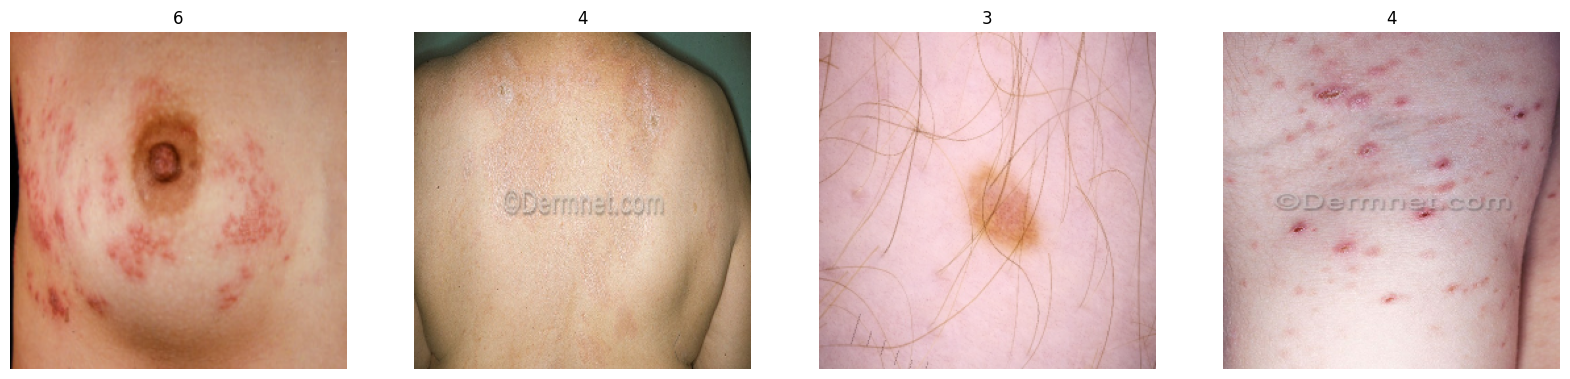

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) #creates a figure with 4 subplots
for idx, img in enumerate(batch[0][:4]): #iterates over the first 4 images in the batch
        ax[idx].imshow(img.astype('uint8')) #displays the image in the subplot
        ax[idx].set_title(batch[1][idx]) #sets the title of the subplot to the label of the image
        ax[idx].axis('off') #turns off the axis for the subplot

        #images in key/index 0, labels in key/index 1

Preprocessing Data

In [51]:
batch[0].max()

np.float32(255.0)

In [52]:
scaled = batch[0] / 255
scaled.max() #max value of the scaled image is 1, min value is 0

np.float32(1.0)

In [53]:
data = data.map(lambda x, y: (x / 255, y)) #scales the images to be between 0 and 1
data.as_numpy_iterator().next() #gets the next batch of data from the iterator, #accesses data pipeline


(array([[[[0.61504287, 0.6385723 , 0.83465075],
          [0.6083027 , 0.6318321 , 0.8222733 ],
          [0.59791666, 0.6214461 , 0.80968136],
          ...,
          [0.26875   , 0.3314951 , 0.43345588],
          [0.26666668, 0.32156864, 0.42745098],
          [0.26666668, 0.32156864, 0.42745098]],
 
         [[0.6253662 , 0.6488956 , 0.84497404],
          [0.6207108 , 0.6442402 , 0.8346814 ],
          [0.602305  , 0.6258344 , 0.8140697 ],
          ...,
          [0.27267158, 0.32757354, 0.43345588],
          [0.26666668, 0.32156864, 0.42745098],
          [0.26666668, 0.32156864, 0.42745098]],
 
         [[0.60284925, 0.62637866, 0.82245713],
          [0.61462927, 0.6381587 , 0.8285999 ],
          [0.60505515, 0.62858456, 0.81681985],
          ...,
          [0.27267158, 0.32757354, 0.43345588],
          [0.26666668, 0.32156864, 0.42745098],
          [0.26666668, 0.32156864, 0.42745098]],
 
         ...,
 
         [[0.6662765 , 0.4106699 , 0.3865019 ],
          [0.67802

In [54]:
scaled_iterator = data.as_numpy_iterator() #creates an iterator for the dataset, #allows us to access data pipeline
scaled_batch = scaled_iterator.next() #gets the next batch of data from the iterator, #accesses data pipeline
scaled_batch[0].max() #max value of the scaled image is 1, min value is 0

np.float32(1.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.18266].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.3730469..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [50.25..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [21.947266..254.92041].


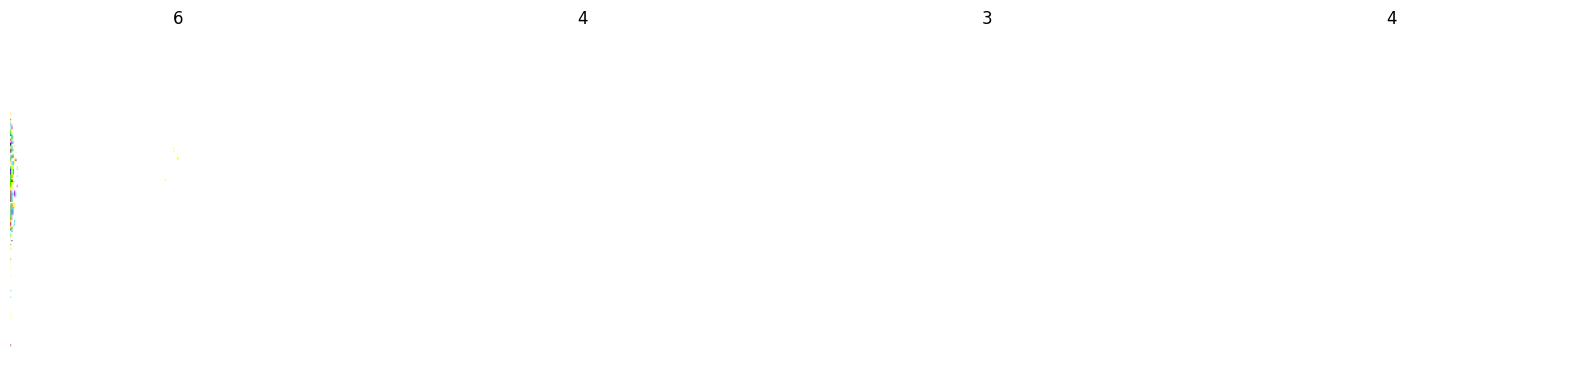

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) #creates a figure with 4 subplots
for idx, img in enumerate(scaled_batch[0][:4]): #iterates over the first 4 images in the batch
        ax[idx].imshow(img) #displays the image in the subplot
        ax[idx].set_title(scaled_batch[1][idx]) #sets the title of the subplot to the label of the image
        ax[idx].axis('off') #turns off the axis for the subplot

        #images in key/index 0, labels in key/index 1